In [28]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [29]:
data = pd.read_csv('C:/Users/Joshua/Documents/git/EntityFinalProject-main/steam200k_genreR.csv')

In [30]:
data.head(5)

,User,Name,Playtime,Genre,Purchace,Play
0,151603712,Fallout 4,87.0,Role-Playing,1,1
1,151603712,Spore,14.9,Strategy,1,1
2,151603712,Left 4 Dead 2,8.9,Shooter,1,1
3,151603712,Left 4 Dead,3.3,Shooter,1,1
4,151603712,Tomb Raider,2.5,Action,1,1


### Question setup

###### What is the difference in playtime between Action, Sports, and Shooter games?

In [31]:
data=data.drop(['Purchace', 'Play'], axis=1)
categories = ['Action', 'Sports','Shooter']
data1 = data['Genre'].isin(categories)
data2 = data[data1].copy()

In [32]:
data.head(5)

,User,Name,Playtime,Genre
0,151603712,Fallout 4,87.0,Role-Playing
1,151603712,Spore,14.9,Strategy
2,151603712,Left 4 Dead 2,8.9,Shooter
3,151603712,Left 4 Dead,3.3,Shooter
4,151603712,Tomb Raider,2.5,Action


In [33]:
data3 = data2[['Genre','Playtime']]
data3.head(5)

,Genre,Playtime
2,Shooter,8.9
3,Shooter,3.3
4,Action,2.5
5,Shooter,1.3
6,Action,0.6


In [34]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7754 entries, 2 to 11930
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genre     7754 non-null   object 
 1   Playtime  7754 non-null   float64
dtypes: float64(1), object(1)
memory usage: 181.7+ KB


In [35]:
def recode (series):
    if series == "Action": 
        return 0
    if series == "Sports": 
        return 1
    if series == "Shooter": 
        return 2

data3['GenreR'] = data3['Genre'].apply(recode)

C:\Users\Joshua\AppData\Local\Temp/ipykernel_3664/4287406493.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['GenreR'] = data3['Genre'].apply(recode)


In [36]:
data3.head(5)

,Genre,Playtime,GenreR
2,Shooter,8.9,2
3,Shooter,3.3,2
4,Action,2.5,0
5,Shooter,1.3,2
6,Action,0.6,0


In [37]:
data4 = data3[['GenreR','Playtime']]
data4.head(5)

,GenreR,Playtime
2,2,8.9
3,2,3.3
4,0,2.5
5,2,1.3
6,0,0.6


### Test Normality

C:\Users\Joshua\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Playtime', ylabel='Density'>

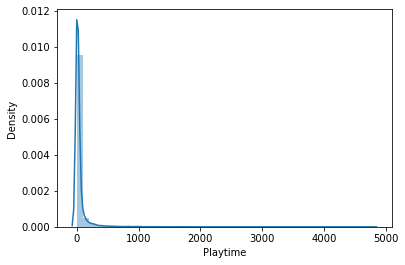

In [38]:
sns.distplot(data4['Playtime'])

In [39]:
data4['PlaytimeSQRT'] = np.sqrt(data4['Playtime'])

C:\Users\Joshua\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PlaytimeSQRT', ylabel='Density'>

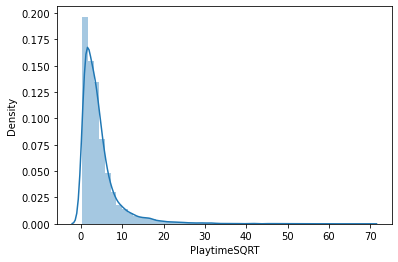

In [40]:
sns.distplot(data4['PlaytimeSQRT'])

### Test for Homogeneity of Variance

#### First we try Bartlett's Test

In [41]:
scipy.stats.bartlett(data4['PlaytimeSQRT'], data4['GenreR'])

BartlettResult(statistic=14978.897294702057, pvalue=0.0)

###### The p value associated with this test is < .05, which means that unfortunately, we have violated the assumption of homogeneity of variance.

#### Next we try Fligner's Test

In [42]:
scipy.stats.fligner(data4['PlaytimeSQRT'], data4['GenreR'])

FlignerResult(statistic=3070.2221524192432, pvalue=0.0)

###### The p value is still < .05, which means we have violated the assumption of homogeneity of variance.

### Computing ANOVAs with Unequal Variance
###### Take results with a grain of salt due to potential inaccuracies

#### Computing Post Hocs with Tukey's

In [43]:
postHoc = MultiComparison(data4['PlaytimeSQRT'], data4['GenreR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   7.8481 0.001  7.3588  8.3373   True
     0      2  -0.3969 0.001 -0.6418  -0.152   True
     1      2   -8.245 0.001 -8.7277 -7.7622   True
---------------------------------------------------


#### Determine Means and Draw Conclusions

In [44]:
data4.groupby('GenreR').mean()

,Playtime,PlaytimeSQRT
GenreR,,
0,31.321470,4.142476
1,250.372885,11.990538
2,26.538254,3.745577


###### Our data shows using the mean of each Genre in this subset of data, Sports has the highest playtime at 250.37 hours, followed by Action at 31.32 hours then fianlly Shooter at 26.54 hours.
